## Time Series Modeling on U.S. Retail Sales

In [23]:
# Load necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn.linear_model  import LogisticRegression
from sklearn.model_selection import train_test_split
from neuralprophet import NeuralProphet

In [24]:
# Read the dataset
df = pd.read_csv('us_retail_sales.csv')
df.tail(5)

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
25,2017,416081,415503,414620,416889,414540,416505,416744.0,417179.0,426501.0,426933.0,431158.0,433282.0
26,2018,432148,434106,433232,435610,439996,438191,440703.0,439278.0,438985.0,444038.0,445242.0,434803.0
27,2019,440751,439996,447167,448709,449552,450927,454012.0,456500.0,452849.0,455486.0,457658.0,458055.0
28,2020,460586,459610,434281,379892,444631,476343,481627.0,483716.0,493327.0,493991.0,488652.0,484782.0
29,2021,520162,504458,559871,562269,548987,550782,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
# Explore dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   YEAR    30 non-null     int64  
 1   JAN     30 non-null     int64  
 2   FEB     30 non-null     int64  
 3   MAR     30 non-null     int64  
 4   APR     30 non-null     int64  
 5   MAY     30 non-null     int64  
 6   JUN     30 non-null     int64  
 7   JUL     29 non-null     float64
 8   AUG     29 non-null     float64
 9   SEP     29 non-null     float64
 10  OCT     29 non-null     float64
 11  NOV     29 non-null     float64
 12  DEC     29 non-null     float64
dtypes: float64(6), int64(7)
memory usage: 3.2 KB


In [26]:
# Check the shape
df.shape

(30, 13)

In [27]:
# Get the description of the dataset
df.describe()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,29.000000,29.000000,29.000000,29.00000,29.000000,29.000000
mean,2006.500000,304803.833333,305200.900000,307533.566667,306719.600000,309205.633333,311406.966667,304375.448276,305451.965517,306078.206897,307310.62069,307794.896552,308099.620690
std,8.803408,97687.399232,96682.043053,100002.422696,98207.161171,99541.010078,101057.212178,92471.103673,92504.808195,93008.417392,92836.64419,92702.551770,91784.061634
min,1992.000000,146925.000000,147223.000000,146805.000000,148032.000000,149010.000000,149800.000000,150761.000000,151067.000000,152588.000000,153521.00000,153583.000000,155614.000000
25%,1999.250000,228856.750000,231470.750000,233019.000000,233235.500000,234976.500000,235967.250000,233948.000000,236566.000000,237481.000000,237553.00000,240544.000000,245485.000000
50%,2006.500000,303486.000000,304592.500000,308655.500000,311233.500000,308690.000000,312957.000000,313520.000000,310046.000000,310673.000000,310479.00000,306675.000000,308413.000000
75%,2013.750000,371527.000000,377008.500000,379221.000000,376797.500000,382698.250000,383839.750000,373554.000000,372489.000000,372505.000000,373663.00000,373914.000000,377032.000000
max,2021.000000,520162.000000,504458.000000,559871.000000,562269.000000,548987.000000,550782.000000,481627.000000,483716.000000,493327.000000,493991.00000,488652.000000,484782.000000


In [28]:
# Reshape the data using Panda Melt method
df =pd.melt(df, id_vars=['YEAR'], var_name = 'Month', value_name = 'Sales')
d = {'JAN':1, 'FEB':2, 'MAR':3, 'APR':4, 'MAY':5, 'JUN':6, 'JUL':7, 'AUG':8, 'SEP':9, 'OCT':10, 'NOV':11, 'DEC':12}
df['Month']= df['Month'].map(d)
df['Date'] = pd.to_datetime(df[['Month','YEAR']].assign(Day=1))
df = df.sort_values(by=['Date']).drop(columns=['Month','YEAR']).reset_index(drop=['index'])


In [29]:
'''
df = pd.melt(df, id_vars=['YEAR'], var_name=['Month'])
df['Date']=pd.to_datetime(df['YEAR'].astype(str)+'-'+df['Month'].astype(str))
df = df.sort_values(by=['Date']).drop(columns=['Month','YEAR']).reset_index(drop=['index'])
'''

"\ndf = pd.melt(df, id_vars=['YEAR'], var_name=['Month'])\ndf['Date']=pd.to_datetime(df['YEAR'].astype(str)+'-'+df['Month'].astype(str))\ndf = df.sort_values(by=['Date']).drop(columns=['Month','YEAR']).reset_index(drop=['index'])\n"

In [37]:
df.tail(10)

,ds,y
350,2021-03-01,559871.0
351,2021-04-01,562269.0
352,2021-05-01,548987.0
353,2021-06-01,550782.0
354,2021-07-01,550782.0
355,2021-08-01,550782.0
356,2021-09-01,550782.0
357,2021-10-01,550782.0
358,2021-11-01,550782.0
359,2021-12-01,550782.0


In [31]:
# Impute data for missing values
#df['Sales']=df['Sales'].fillna(df['Sales'].mean())
df['Sales']=df['Sales'].fillna(method='ffill')

In [32]:
# Check the dataframe after handling the missing values
df

,Sales,Date
0,146925.0,1992-01-01
1,147223.0,1992-02-01
2,146805.0,1992-03-01
3,148032.0,1992-04-01
4,149010.0,1992-05-01
...,...,...
355,550782.0,2021-08-01
356,550782.0,2021-09-01
357,550782.0,2021-10-01
358,550782.0,2021-11-01


In [33]:
# Rename the dataframe with date and sales as 'ds' and 'y', respectively
df = df[["Date", "Sales"]]
df.rename(columns={"Date": "ds", "Sales":"y"}, inplace=True)

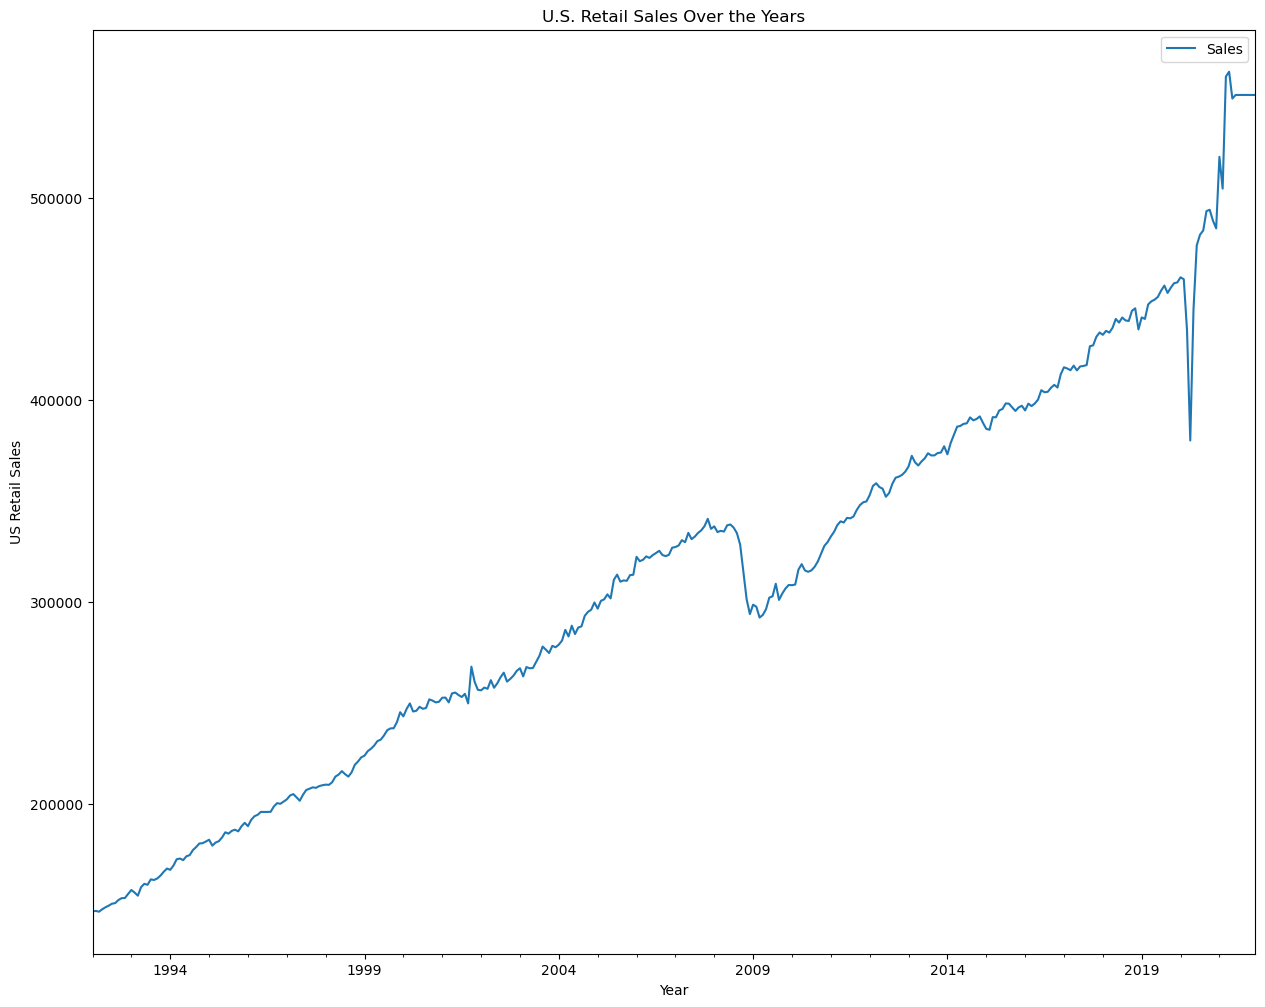

In [34]:
# 1. Plot the date for sales over time
ax = df.set_index('ds').plot(figsize=(15, 12))
ax.set_ylabel('US Retail Sales')
ax.set_xlabel('Year')
ax.legend(['Sales'])

plt.title("U.S. Retail Sales Over the Years")
plt.show()

### The above graph shows that the retailers suffered a significant drop in sales during the 2008-2009 recession.  But during the beginning of the pandemic in 2020, there was even a significant decline in retail sales as indicated by a cliff.  Once the retail hit its rock bottom, it slowly rebounded up and climbed past the pre-pandemic high.

In [35]:
# 2. Split the data into a training and test set.  Use the last year of data (July 2020 - June 2021) of data as 
# your test set and the rest as your training set. 
df_train = df[df['ds'] < '2020-07-01']
df_test = df[df['ds'] >= '2020-07-01']


In [ ]:
df_test.tail(10)

In [15]:
# 3. Use the training set to build a predictive model for the monthly retail sales
m = NeuralProphet()  # Intialize the predictive model with Neural Prophet, using default variables

# Fit the train data and the test data from #2 to the predictive model built w/ Neural Propet
metrics_train = m.fit(df=df_train, freq="M")
metrics_test = m.test(df=df_test)

INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to 91.228% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - M
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 286


  0%|          | 0/116 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 9.23E-01, min: 1.32E+00


  0%|          | 0/116 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 7.71E-01, min: 1.32E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 4.14E-01
Epoch[286/286]: 100%|█| 286/286 [00:08<00:00, 33.90it/s, SmoothL1Loss=0.000325, 
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to 88.889% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - M
INFO - (NP.forecaster._evaluate) - Validation metrics:    SmoothL1Loss       MAE      RMSE
1         0.023 57319.297 62984.695


In [16]:
'''
m = NeuralProphet(
    weekly_seasonality=True,
    daily_seasonality=True,
    batch_size=16,
    epochs=286,
    learning_rate=0.01)
#df_train, df_test = m.split_df(df, freq='M', valid_p = 0.2)
metrics_train = m.fit(df=df_train, freq="M")
metrics_test = m.test(df=df_test)
'''

'\nm = NeuralProphet(\n    weekly_seasonality=True,\n    daily_seasonality=True,\n    batch_size=16,\n    epochs=286,\n    learning_rate=0.01)\n#df_train, df_test = m.split_df(df, freq=\'M\', valid_p = 0.2)\nmetrics_train = m.fit(df=df_train, freq="M")\nmetrics_test = m.test(df=df_test)\n'

INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to 91.228% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 286
Epoch[286/286]: 100%|█| 286/286 [00:05<00:00, 47.95it/s, SmoothL1Loss=0.000317, 
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to 91.389% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
WARNING - (py.warnings._s

Text(0.5, 1.0, 'U.S. Sales Forecast')

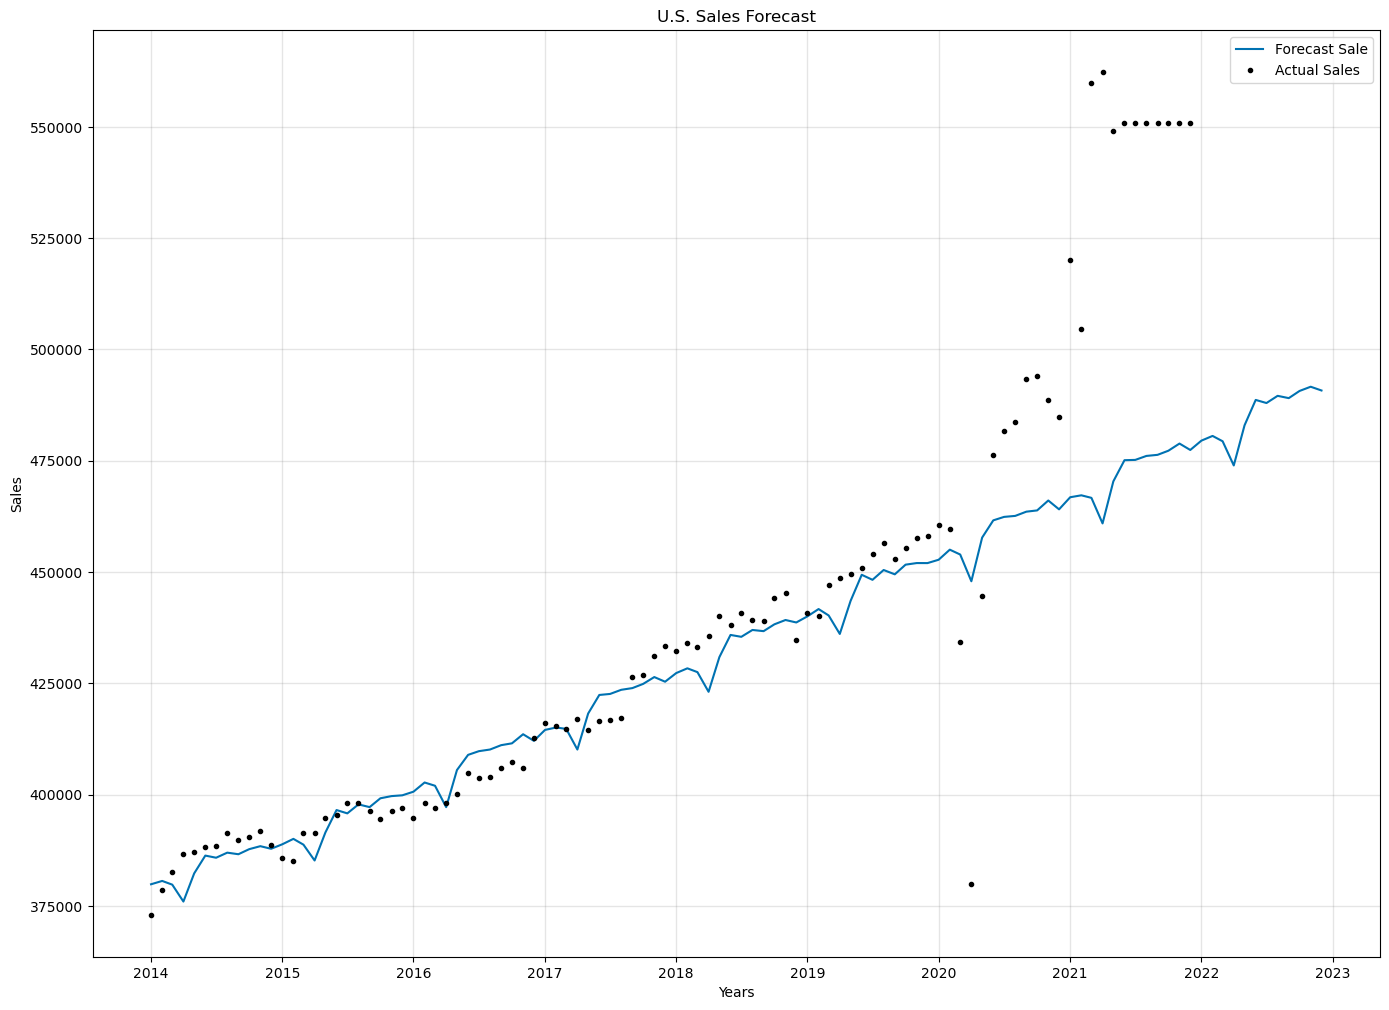

In [17]:
# 4. Use the model to predict the monthly retail sales on the last year of data
m = NeuralProphet(seasonality_mode="multiplicative", learning_rate=0.1)
metrics_train2 = m.fit(df=df_train, freq="MS")
future = m.make_future_dataframe(df, periods=12, n_historic_predictions=96)
forecast = m.predict(future)

#fig.legend(['Forecast Sales','Actual Sales'])
fig, ax = plt.subplots(figsize=(14,10))
m.plot(forecast, xlabel="Years", ylabel="Sales", ax=ax)
ax.legend(['Forecast Sale','Actual Sales'])
plt.title('U.S. Sales Forecast')


In [18]:
'''
# 4. Use the model to predict the monthly retail sales on the last year of data
m = NeuralProphet(seasonality_mode="multiplicative", learning_rate=0.1)

metrics = m.fit(df=df_train, freq='MS', validation_df=df_test, progress="plot")
'''

'\n# 4. Use the model to predict the monthly retail sales on the last year of data\nm = NeuralProphet(seasonality_mode="multiplicative", learning_rate=0.1)\n\nmetrics = m.fit(df=df_train, freq=\'MS\', validation_df=df_test, progress="plot")\n'

In [22]:
metrics_train.tail(10)

,SmoothL1Loss,MAE,RMSE,RegLoss
276,0.000331,4714.479621,6912.021567,0.0
277,0.000332,4751.302175,6844.633800,0.0
278,0.000329,4699.055370,6871.276573,0.0
279,0.000328,4643.503978,6764.502456,0.0
280,0.000327,4616.438916,6771.701280,0.0
281,0.000326,4633.971951,6642.525950,0.0
282,0.000325,4641.234101,6576.939496,0.0
283,0.000325,4636.926946,6812.213422,0.0
284,0.000325,4636.807977,6672.405039,0.0
285,0.000325,4636.617095,6713.769775,0.0


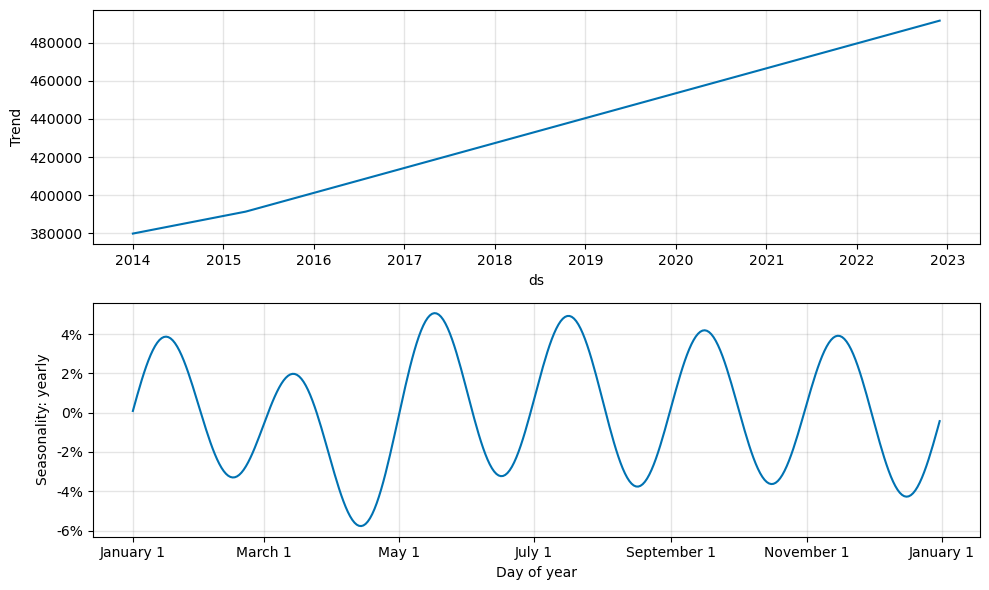

In [23]:
# 4a. Show the seasonality as a percent of the trend
fig_param = m.plot_components(forecast)

In [24]:
# 5. Report the RMSE of the model predictions on the test set
metrics_test

,SmoothL1Loss,MAE,RMSE
0,0.022964,57319.296875,62984.695312
